In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [5]:
df = pd.read_csv('data/train2.tsv', delimiter='\t')

In [6]:
df.shape

(10239, 16)

In [7]:
df.columns = ['serialNo', 'ID', 'label', 'statement', 'subject', 'speaker', 'speakerTitle', 'state', 'party', 'barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'context', 'justification']

In [8]:
df

,serialNo,ID,label,statement,subject,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire,context,justification
0,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."
5,6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,But determining that would take significant de...
6,7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.","However, it was not that bill, but another one..."
7,8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,But Johnson is correct that many other factors...
8,9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,Considering that the $532 million figure cover...
9,10,7115.json,mostly-true,"For the first time in history, the share of th...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech,The senators correct that Latino voters put Ob...


## Data Cleaning

In [9]:
pstemmer = nltk.stem.PorterStemmer()
stopWords = set(nltk.corpus.stopwords.words('english'))

In [10]:
del df['serialNo']
del df['ID']

In [11]:
col = ['label', 'statement', 'subject', 'speaker', 'speakerTitle', 'state', 'party', 'barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'context', 'justification']

In [12]:
for c in col:
    print(c, df[c].isnull().values.any())

label False
statement False
subject True
speaker True
speakerTitle True
state True
party True
barely-true True
false True
half-true True
mostly-true True
pants-fire True
context True
justification True


**Replace Nan values**

In [13]:
values_nan = {'subject': 'unknown', 'speaker': 'unknown', 'speakerTitle': 'unknown', 'state': 'unknown', 'party': 'unknown', 'barely-true': 0.0, 'false': 0.0, 'half-true': 0.0, 'mostly-true': 0.0, 'pants-fire': 0.0, 'context': 'unknown', 'justification': 'unknown'}
df.fillna(value=values_nan, inplace=True)

df.label.replace({'half-true': 2, 'mostly-true': 1, 'false': 4, 'true': 0, 'barely-true': 3, 'pants-fire': 5, 'unknown': 6}, inplace=True)

In [14]:
for c in col:
    print(c, df[c].isnull().values.any())

label False
statement False
subject False
speaker False
speakerTitle False
state False
party False
barely-true False
false False
half-true False
mostly-true False
pants-fire False
context False
justification False


In [15]:
df['statement'] = df['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))
df['statement'] = df['statement'].apply(lambda x: pstemmer.stem(x))

df['context'] = df['context'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))
df['context'] = df['context'].apply(lambda x: pstemmer.stem(x))

df['justification'] = df['justification'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))
df['justification'] = df['justification'].apply(lambda x: pstemmer.stem(x))

In [16]:
df

,label,statement,subject,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire,context,justification
0,2,when decline coal start? it started natural ga...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech.,"surovell said decline coal ""started natural ga..."
1,1,"hillary clinton agrees john mccain ""by voting ...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver,obama said would voted amendment present. so t...
2,4,health care reform legislation likely mandate ...,health-care,blog-posting,unknown,unknown,none,7.0,19.0,3.0,5.0,44.0,news releas,the release may point mikulskis comment could ...
3,2,the economic turnaround started end term.,"economy,jobs",charlie-crist,unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview cnn,"crist said economic ""turnaround started end te..."
4,0,the chicago bears starting quarterbacks last 1...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,online opinion-piec,"but vos specifically used word ""fired,"" means ..."
5,3,jim dunnam lived district represents years now.,candidates-biography,republican-party-texas,unknown,Texas,republican,3.0,1.0,1.0,3.0,1.0,press release.,but determining would take significant detecti...
6,2,i'm person stage worked actively last year pas...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"democratic debate philadelphia, pa.","however, bill, another one, sponsored majority..."
7,2,"however, took $19.5 million oregon lottery fun...",jobs,oregon-lottery,unknown,unknown,organization,0.0,0.0,1.0,0.0,1.0,websit,but johnson correct many factors played role l...
8,1,says gop primary opponents glenn grothman joe ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,online video,considering $532 million figure covers 5 years...
9,1,"for first time history, share national popular...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,speech,the senators correct latino voters put obama t...


In [17]:
df['speaker'] = df['speaker'].apply(lambda x: x.replace('-', ''))

In [18]:
df

,label,statement,subject,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire,context,justification
0,2,when decline coal start? it started natural ga...,"energy,history,job-accomplishments",scottsurovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech.,"surovell said decline coal ""started natural ga..."
1,1,"hillary clinton agrees john mccain ""by voting ...",foreign-policy,barackobama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver,obama said would voted amendment present. so t...
2,4,health care reform legislation likely mandate ...,health-care,blogposting,unknown,unknown,none,7.0,19.0,3.0,5.0,44.0,news releas,the release may point mikulskis comment could ...
3,2,the economic turnaround started end term.,"economy,jobs",charliecrist,unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview cnn,"crist said economic ""turnaround started end te..."
4,0,the chicago bears starting quarterbacks last 1...,education,robinvos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,online opinion-piec,"but vos specifically used word ""fired,"" means ..."
5,3,jim dunnam lived district represents years now.,candidates-biography,republicanpartytexas,unknown,Texas,republican,3.0,1.0,1.0,3.0,1.0,press release.,but determining would take significant detecti...
6,2,i'm person stage worked actively last year pas...,ethics,barackobama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"democratic debate philadelphia, pa.","however, bill, another one, sponsored majority..."
7,2,"however, took $19.5 million oregon lottery fun...",jobs,oregonlottery,unknown,unknown,organization,0.0,0.0,1.0,0.0,1.0,websit,but johnson correct many factors played role l...
8,1,says gop primary opponents glenn grothman joe ...,"energy,message-machine-2014,voting-record",dueystroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,online video,considering $532 million figure covers 5 years...
9,1,"for first time history, share national popular...",elections,robertmenendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,speech,the senators correct latino voters put obama t...


In [19]:
speaker_dict = dict()
for i, speaker in enumerate(pd.unique(df['speaker'])):
    speaker_dict[speaker] = i

In [20]:
df.speaker.replace(speaker_dict, inplace=True)

In [21]:
df

,label,statement,subject,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire,context,justification
0,2,when decline coal start? it started natural ga...,"energy,history,job-accomplishments",0,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech.,"surovell said decline coal ""started natural ga..."
1,1,"hillary clinton agrees john mccain ""by voting ...",foreign-policy,1,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver,obama said would voted amendment present. so t...
2,4,health care reform legislation likely mandate ...,health-care,2,unknown,unknown,none,7.0,19.0,3.0,5.0,44.0,news releas,the release may point mikulskis comment could ...
3,2,the economic turnaround started end term.,"economy,jobs",3,unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview cnn,"crist said economic ""turnaround started end te..."
4,0,the chicago bears starting quarterbacks last 1...,education,4,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,online opinion-piec,"but vos specifically used word ""fired,"" means ..."
5,3,jim dunnam lived district represents years now.,candidates-biography,5,unknown,Texas,republican,3.0,1.0,1.0,3.0,1.0,press release.,but determining would take significant detecti...
6,2,i'm person stage worked actively last year pas...,ethics,1,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"democratic debate philadelphia, pa.","however, bill, another one, sponsored majority..."
7,2,"however, took $19.5 million oregon lottery fun...",jobs,6,unknown,unknown,organization,0.0,0.0,1.0,0.0,1.0,websit,but johnson correct many factors played role l...
8,1,says gop primary opponents glenn grothman joe ...,"energy,message-machine-2014,voting-record",7,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,online video,considering $532 million figure covers 5 years...
9,1,"for first time history, share national popular...",elections,8,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,speech,the senators correct latino voters put obama t...


In [63]:
vectorizer = CountVectorizer(binary=True, stop_words=nltk.corpus.stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=3000)
vectorizer.fit_transform(df['statement']).toarray().shape

(10239, 3000)

In [66]:
vectorizer = CountVectorizer(binary=True, stop_words=nltk.corpus.stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=3000)
vectorizer.fit_transform(df['statement']).toarray().shape

ValueError: Iterable over raw text documents expected, string object received.

In [22]:
df['statement'] = vectorizer.fit_transform(df['statement'])

NameError: name 'vectorizer' is not defined

In [70]:
df['justification'] = vectorizer.fit_transform(df['justification'])

In [87]:
df['context'] = vectorizer.fit_transform(df['context'])

In [95]:
df['subject'] = vectorizer.fit_transform(df['subject'])

In [79]:
speakerTitle_dict = dict()
for i, speakerTitle in enumerate(pd.unique(df['speakerTitle'])):
    speakerTitle_dict[speakerTitle] = i

In [81]:
df.speakerTitle.replace(speakerTitle_dict, inplace=True)

In [83]:
state_dict = dict()
for i, state in enumerate(pd.unique(df['state'])):
    state_dict[state] = i

df.state.replace(state_dict, inplace=True)

In [85]:
party_dict = dict()
for i, party in enumerate(pd.unique(df['party'])):
    party_dict[party] = i

df.party.replace(party_dict, inplace=True)

In [96]:
df

,label,statement,subject,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire,context,justification
0,2,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",0,0,0,0,0.0,0.0,1.0,1.0,0.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
1,1,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",1,1,1,0,70.0,71.0,160.0,163.0,9.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
2,4,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",2,2,2,1,7.0,19.0,3.0,5.0,44.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
3,2,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",3,2,3,0,15.0,9.0,20.0,19.0,2.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
4,0,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",4,3,4,2,0.0,3.0,2.0,5.0,1.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
5,3,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",5,2,5,2,3.0,1.0,1.0,3.0,1.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
6,2,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",1,1,1,0,70.0,71.0,160.0,163.0,9.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
7,2,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",6,2,2,3,0.0,0.0,1.0,0.0,1.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
8,1,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",7,4,4,2,0.0,0.0,0.0,1.0,0.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."
9,1,"(0, 181)\t1\n (0, 463)\t1\n (0, 1194)\t1\n...","(0, 5)\t1\n (0, 89)\t1\n (0, 77)\t1\n (0,...",8,5,6,0,1.0,3.0,1.0,3.0,0.0,"(0, 713)\t1\n (0, 282)\t1\n (1, 220)\t1\n ...","(0, 166)\t1\n (0, 2091)\t1\n (0, 2028)\t1\..."


In [102]:
X = df.loc[:, df.columns != 'label']
y = df['label']

In [107]:
X = X['statement']
X.shape

(10239,)

In [111]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='relu', input_dim=1))
model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 501       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.fit(X[:-100], y[:-100], 
          epochs=2, batch_size=128, verbose=1, 
          validation_data=(X[-100:], y[-100:]))

Train on 10139 samples, validate on 100 samples
Epoch 1/2


ValueError: setting an array element with a sequence.

In [106]:
model.fit(X[:-100], y[:-100], 
          epochs=2, batch_size=128, verbose=1, 
          validation_data=(X[-100:], y[-100:]))

Train on 10139 samples, validate on 100 samples
Epoch 1/2


ValueError: setting an array element with a sequence.

## Train only using statement

In [130]:
X = df['statement']
y = df['label']

In [131]:
vectorizer = CountVectorizer(binary=True, stop_words=nltk.corpus.stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=3000)
X_train = vectorizer.fit_transform(X)

In [132]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               1500500   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 501       
Total params: 1,501,001
Trainable params: 1,501,001
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.fit(X_train[:-100], y[:-100], 
          epochs=2, batch_size=128, verbose=1, 
          validation_data=(X_train[-100:], y[-100:]))

Train on 10139 samples, validate on 100 samples
Epoch 1/2
10139/10139 [==============================] - 2s 212us/step - loss: -8.2643 - acc: 0.1912 - val_loss: -20.6912 - val_acc: 0.2000
Epoch 2/2
10139/10139 [==============================] - 1s 140us/step - loss: -19.6890 - acc: 0.1915 - val_loss: -22.0434 - val_acc: 0.2000


In [136]:
scores = model.evaluate(X_train[2000:2600], y[2000:2600], verbose=1)
print("Accuracy:", scores[1])

600/600 [==============================] - 0s 69us/step
Accuracy: 0.17666666666666667


In [1]:
from models.DNN_S import model_dnnS
from data.load_data import load_train, load_test, load_val
from data.clean_data import clean_data

Using TensorFlow backend.


In [2]:
model_dnnS(clean_data(load_train()), clean_data(load_val()), clean_data(load_test()))

============ Data Shape ============
Data shape:  (10239, 16)
============ Data Shape ============
Data shape:  (1283, 16)
============ Data Shape ============
Data shape:  (1266, 16)
Instructions for updating:
Colocations handled automatically by placer.


============ Model Summary ============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               1500500   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 1,501,001
Trainable params: 1,501,001
Non-trainable params: 0
_________________________________________________________________


============ Model Training ============
Instructions for updating:
Use tf.cast instead.
Train on 10239 samples, validate on 1283 samples
Epoch 1/2
10239/10239 [==============================] - 2s 166us/step - loss: -8.3623 - a

In [40]:
train_data = clean_data(load_train())
val_data = clean_data(load_val())
test_data = clean_data(load_test())

============ Data Shape ============
Data shape:  (10239, 16)
============ Data Shape ============
Data shape:  (1283, 16)
============ Data Shape ============
Data shape:  (1266, 16)


In [28]:
train_data

,label,statement,subject,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire,context,justification
0,2,when decline coal start? it started natural ga...,"energy,history,job-accomplishments",0,0,0,0,0.0,0.0,1.0,1.0,0.0,floor speech.,"surovell said decline coal ""started natural ga..."
1,1,"hillary clinton agrees john mccain ""by voting ...",foreign-policy,1,1,1,0,70.0,71.0,160.0,163.0,9.0,denver,obama said would voted amendment present. so t...
2,4,health care reform legislation likely mandate ...,health-care,2,2,2,1,7.0,19.0,3.0,5.0,44.0,news releas,the release may point mikulskis comment could ...
3,2,the economic turnaround started end term.,"economy,jobs",3,2,3,0,15.0,9.0,20.0,19.0,2.0,interview cnn,"crist said economic ""turnaround started end te..."
4,0,the chicago bears starting quarterbacks last 1...,education,4,3,4,2,0.0,3.0,2.0,5.0,1.0,online opinion-piec,"but vos specifically used word ""fired,"" means ..."
5,3,jim dunnam lived district represents years now.,candidates-biography,5,2,5,2,3.0,1.0,1.0,3.0,1.0,press release.,but determining would take significant detecti...
6,2,i'm person stage worked actively last year pas...,ethics,1,1,1,0,70.0,71.0,160.0,163.0,9.0,"democratic debate philadelphia, pa.","however, bill, another one, sponsored majority..."
7,2,"however, took $19.5 million oregon lottery fun...",jobs,6,2,2,3,0.0,0.0,1.0,0.0,1.0,websit,but johnson correct many factors played role l...
8,1,says gop primary opponents glenn grothman joe ...,"energy,message-machine-2014,voting-record",7,4,4,2,0.0,0.0,0.0,1.0,0.0,online video,considering $532 million figure covers 5 years...
9,1,"for first time history, share national popular...",elections,8,5,6,0,1.0,3.0,1.0,3.0,0.0,speech,the senators correct latino voters put obama t...


In [67]:
X_train, y_train = train_data['statement'], train_data['label'].astype('int')
X_val, y_val = val_data['statement'], val_data['label'].astype('int')
X_test, y_test = test_data['statement'], test_data['label'].astype('int')

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, stop_words=nltk.corpus.stopwords.words('english'),
                                 lowercase=True, min_df=3, max_df=0.9, max_features=3000)

X_train_onehotvector = vectorizer.fit_transform(X_train)

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000).fit(X_train_onehotvector, y_train)

In [68]:
clf.score(vectorizer.transform(X_val), y_val)

0.24006235385814498

In [90]:
new_data = pd.concat([train_data['speaker'], pd.DataFrame(X_train_onehotvector.toarray())], axis=1)

In [91]:
new_data

,speaker,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(new_data, y_train)

/home/ritesh/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [95]:
clf.score(pd.concat([val_data['speaker'], pd.DataFrame(vectorizer.transform(X_val).toarray())], axis=1), y_val)

0.23304754481683554

In [105]:
train_data.iloc[:, 3:12]

,speaker,speakerTitle,state,party,barely-true,false,half-true,mostly-true,pants-fire
0,0,0,0,0,0.0,0.0,1.0,1.0,0.0
1,1,1,1,0,70.0,71.0,160.0,163.0,9.0
2,2,2,2,1,7.0,19.0,3.0,5.0,44.0
3,3,2,3,0,15.0,9.0,20.0,19.0,2.0
4,4,3,4,2,0.0,3.0,2.0,5.0,1.0
5,5,2,5,2,3.0,1.0,1.0,3.0,1.0
6,1,1,1,0,70.0,71.0,160.0,163.0,9.0
7,6,2,2,3,0.0,0.0,1.0,0.0,1.0
8,7,4,4,2,0.0,0.0,0.0,1.0,0.0
9,8,5,6,0,1.0,3.0,1.0,3.0,0.0


In [112]:
pd.concat([train_data['speaker'], pd.DataFrame(X_train_onehotvector.toarray())], axis=1).shape

(10239, 3001)

In [110]:
train_data['speaker'].shape

(10239,)

In [111]:
pd.DataFrame(X_train_onehotvector.toarray()).shape

(10239, 3000)

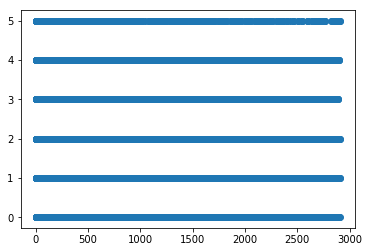

In [115]:
plt.scatter(train_data['speaker'], train_data['label'])

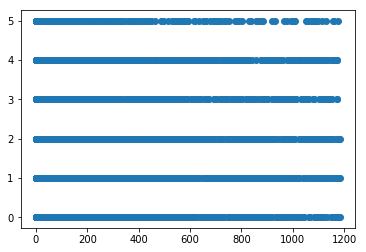

In [116]:
plt.scatter(train_data['speakerTitle'], train_data['label'])

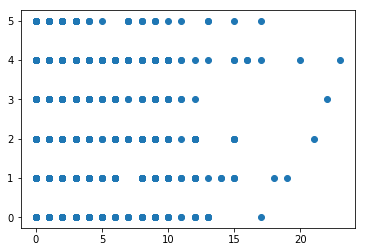

In [117]:
plt.scatter(train_data['party'], train_data['label'])

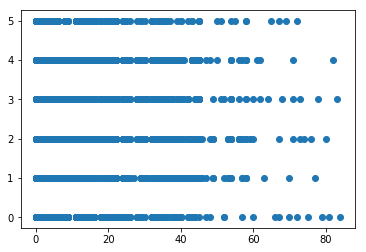

In [118]:
plt.scatter(train_data['state'], train_data['label'])